In [4]:
from PIL import Image
import cv2 
from test_utils import calculate_metrics
import numpy as np
import glob

# Define root directories for different types
root_dirs = {
    'hi': 'data/00096_0576/cannyseg/hi',
    'lo': 'data/00096_0576/cannyseg/lo',
    'mi': 'data/00096_0576/cannyseg/mi'
}

# Path to original images
image_paths = ['data/00096_0576/im1.png', 'data/00096_0576/im2.png', 'data/00096_0576/im3.png', 'data/00096_0576/im4.png', 'data/00096_0576/im5.png', 'data/00096_0576/im6.png', 'data/00096_0576/im7.png']

# Load original images
original_images = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in image_paths]

# Function to calculate metrics for a given type
def calculate_metrics_for_type(type_name, root_dir):
    # Paths to decompressed residues and preds
    decompressed_residue_paths = glob.glob(f'{root_dir}/residues/*.tfci.png')
    preds_paths = glob.glob(f'{root_dir}/preds/*.png')
    # print(preds_paths,decompressed_residue_paths)

    # Load residues and preds
    residues = [cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB) for image_path in decompressed_residue_paths]
    preds = [cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB) for image_path in preds_paths]

    psnr_values = []
    mssim_values = []
    reconstructions = []
    
    for pred, residue, original_image in zip(preds, residues, original_images):
        recons_img = pred + residue
        
        # Resize original image if shapes don't match
        if original_image.shape != pred.shape:
            original_image = cv2.resize(original_image, (pred.shape[1], pred.shape[0]))
        
        orig_pil = Image.fromarray(original_image)
        recons_pil = Image.fromarray(recons_img)
        reconstructions.append(recons_img)
        
        # Calculate metrics
        psnr_value, mssim_value = calculate_metrics(orig_pil, [recons_pil])
        
        # Store the results
        psnr_values.append(psnr_value)
        mssim_values.append(mssim_value)

    # Calculate mean PSNR and MS-SSIM
    mean_psnr = np.mean(psnr_values)
    mean_mssim = np.mean(mssim_values)
    
    
    return mean_psnr, mean_mssim

# Array to store results for each type
results = []

# Iterate over the three types and calculate the metrics
for type_name, root_dir in root_dirs.items():
    mean_psnr, mean_mssim = calculate_metrics_for_type(type_name, root_dir)
    
    # Store the results in the array
    results.append({
        'type': type_name,
        'mean_psnr': mean_psnr,
        'mean_mssim': mean_mssim
    })

# Output the results
for result in results:
    print(f"\nType: {result['type'].upper()}")
    print(f"Mean PSNR: {result['mean_psnr']:.2f}")
    print(f"Mean MS-SSIM: {result['mean_mssim']:.4f}")


Type: HI
Mean PSNR: 13.70
Mean MS-SSIM: 0.5823

Type: LO
Mean PSNR: 13.64
Mean MS-SSIM: 0.5277

Type: MI
Mean PSNR: 13.09
Mean MS-SSIM: 0.4950


In [6]:
import os

# Define the root folder
root_folder = 'data/00096_0576_processed'

# Subdirectories
sub_dirs = ['hi', 'lo', 'mi']

def get_folder_size(folder_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            if os.path.isfile(file_path):
                total_size += os.path.getsize(file_path)
    return total_size

# Iterate over each subdirectory and calculate the size of the compressed folder
for sub_dir in sub_dirs:
    compressed_folder_path = os.path.join(root_folder, sub_dir, 'compressed')
    
    # Calculate the folder size
    folder_size = get_folder_size(compressed_folder_path)
    
    print(f"Size of {sub_dir}/compressed: {folder_size:.2f} Bytes")


Size of hi/compressed: 111978.00 Bytes
Size of lo/compressed: 42263.00 Bytes
Size of mi/compressed: 73242.00 Bytes


In [21]:
## after video prediction we evaluate codec (meaning adding residue)
from PIL import Image
import cv2 
from test_utils import calculate_metrics
import numpy as np
import glob


decompressed_residue_paths = glob.glob('data/00096_0576/residues_cs/low/*.tfci.png')
preds_paths = glob.glob('data/00096_0576/preds_cs_lo/*.png')
image_paths = ['data/00096_0576/im1.png', 'data/00096_0576/im2.png', 'data/00096_0576/im3.png', 'data/00096_0576/im4.png', 'data/00096_0576/im5.png', 'data/00096_0576/im6.png', 'data/00096_0576/im7.png']

original_images = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in image_paths]
residues = [cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB) for image_path in decompressed_residue_paths]
preds = [cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB) for image_path in preds_paths]

psnr_values = []
mssim_values = []
reconstructions = []
for pred,residue,original_image in zip(preds,residues,original_images):
    recons_img = pred+residue
    if original_image.shape != pred.shape:
        original_image = cv2.resize(original_image, (pred.shape[1], pred.shape[0]))
    orig_pil = Image.fromarray(original_image)
    recons_pil = Image.fromarray(recons_img)
    reconstructions.append(recons_img)
    
    # Calculate metrics
    psnr_value, mssim_value = calculate_metrics(orig_pil, [recons_pil])
    
    # Store the results
    psnr_values.append(psnr_value)
    mssim_values.append(mssim_value)

# Calculate mean PSNR and MS-SSIM
mean_psnr = np.mean(psnr_values)
mean_mssim = np.mean(mssim_values)

print(f"\nMean PSNR: {mean_psnr:.2f}")
print(f"Mean MS-SSIM: {mean_mssim:.4f}")


Mean PSNR: 13.49
Mean MS-SSIM: 0.5312


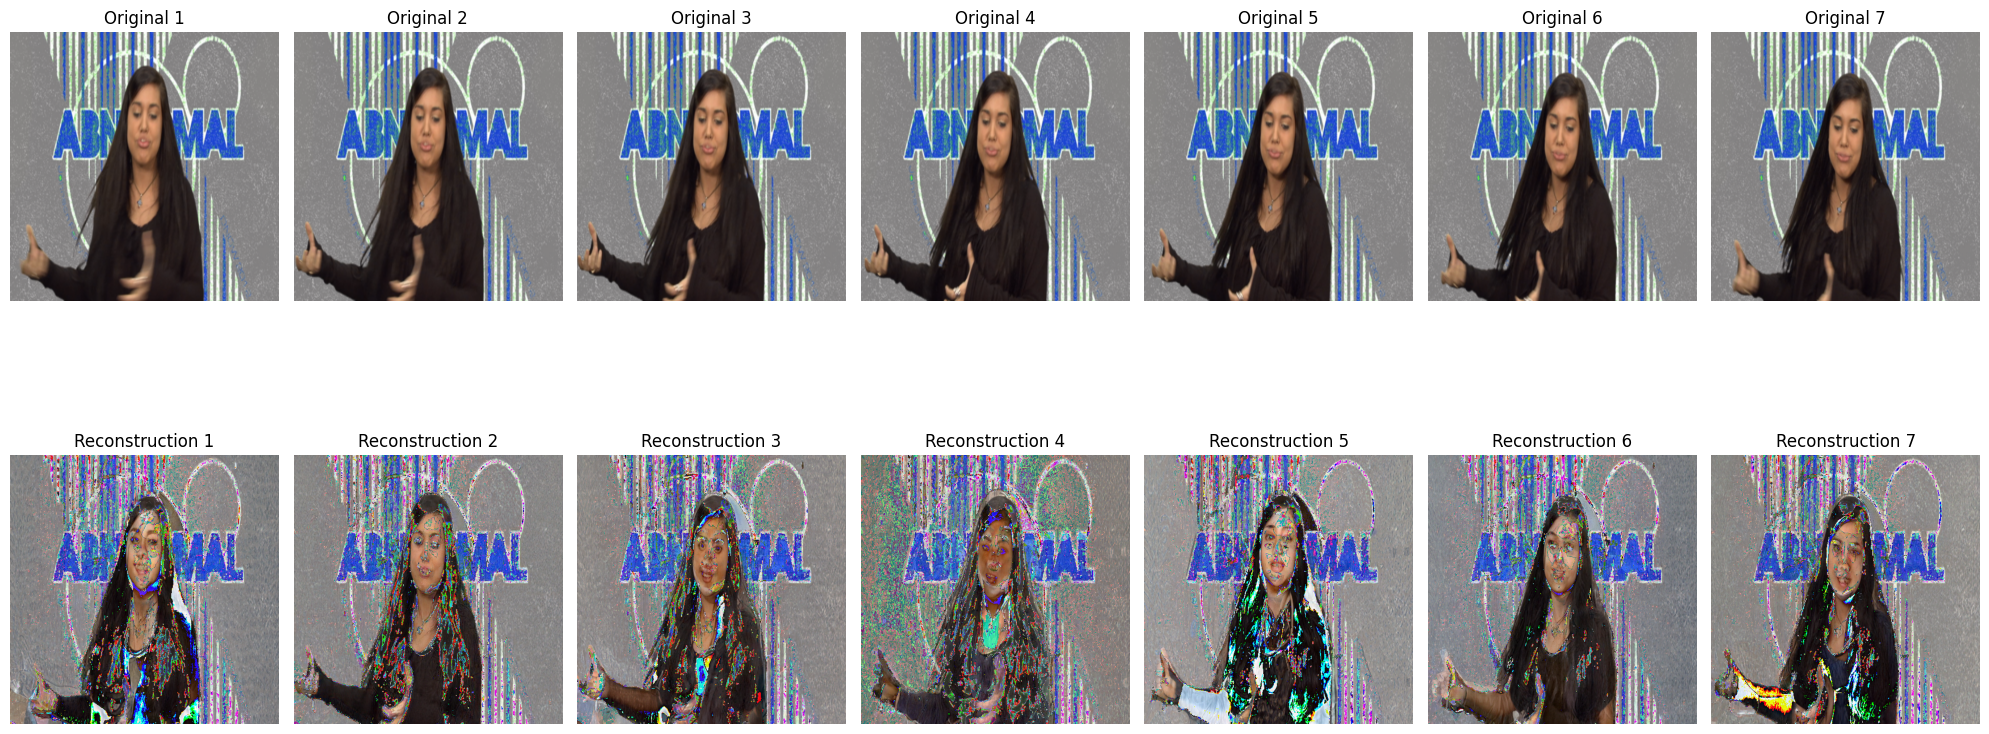

In [6]:
import matplotlib.pyplot as plt

# Display the original and reconstructed images
num_images = len(reconstructions)
fig, axs = plt.subplots(2, num_images, figsize=(20, 10))

for i in range(num_images):
    # Resize original images to match the reconstructed image size
    original_resized = cv2.resize(original_images[i], (reconstructions[i].shape[1], reconstructions[i].shape[0]))

    # Display original images
    axs[0, i].imshow(original_resized)
    axs[0, i].set_title(f"Original {i + 1}")
    axs[0, i].axis('off')

    # Display reconstructed images
    axs[1, i].imshow(reconstructions[i])
    axs[1, i].set_title(f"Reconstruction {i + 1}")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()


In [7]:
import os
os.path.getsize('data/00096_0576/residues_cs/low/im1_residue.tfci')

12596

In [8]:
os.path.getsize('data/00096_0576/residues_cs/medium/im1_residue.tfci')

22032

In [11]:
os.path.getsize('data/00096_0576/residues_cs/im1_residue.png.tfci')

36112

In [20]:
import os

def calculate_tfci_size(folder_path):
    total_size = 0
    # Iterate through all files in the directory
    for filename in os.listdir(folder_path):
        if filename.endswith(".tfci"):
            file_path = os.path.join(folder_path, filename)
            file_size = os.path.getsize(file_path)
            total_size += file_size
            print(f"File: {filename}, Size: {file_size} bytes")
    
    print(f"\nTotal size of .tfci files: {total_size} bytes")
    return total_size

# Example usage
folder_path = 'data/00096_0576/residues_cs/'
calculate_tfci_size(folder_path)


File: im3_residue.png.tfci, Size: 29112 bytes
File: im7_residue.png.tfci, Size: 28180 bytes
File: im2_residue.png.tfci, Size: 29645 bytes
File: im1_residue.png.tfci, Size: 36112 bytes
File: im6_residue.png.tfci, Size: 28013 bytes
File: im5_residue.png.tfci, Size: 26401 bytes
File: im4_residue.png.tfci, Size: 26788 bytes

Total size of .tfci files: 204251 bytes


204251